In [1]:
import os
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from PIL import Image

In [4]:
import matplotlib.pyplot as plt

In [5]:
data_dir = "/Users/cisilkaraguzel/Documents/GitHub/artify/data" 
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_SPLIT = 0.3
VAL_SPLIT = 0.1
TEST_SPLIT = 0.6
MODEL_SAVE_PATH = "models/painter_classification_model.pth"
LEARNING_RATE = 0.001

In [ ]:
file_counts = {}

for painter_folder in os.listdir(data_dir):
    painter_path = os.path.join(data_dir, painter_folder) 
    print(painter_path)

    folder_path = os.path.join(data_dir, painter_folder)
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    print("Number of files:", num_files)

/Users/cisilkaraguzel/Documents/GitHub/artify/data/pierre_auguste_renoir
Number of files: 1369
/Users/cisilkaraguzel/Documents/GitHub/artify/data/georges_braque
Number of files: 189
/Users/cisilkaraguzel/Documents/GitHub/artify/data/claude_monet
Number of files: 1028
/Users/cisilkaraguzel/Documents/GitHub/artify/data/paul_cezanne
Number of files: 446
/Users/cisilkaraguzel/Documents/GitHub/artify/data/salvador_dali
Number of files: 459
/Users/cisilkaraguzel/Documents/GitHub/artify/data/vincent_van_gogh
Number of files: 1620
/Users/cisilkaraguzel/Documents/GitHub/artify/data/pablo_picasso
Number of files: 672


In [48]:
file_counts = {}

for painter_folder in os.listdir(data_dir):
    painter_path = os.path.join(data_dir, painter_folder)
    if os.path.isdir(painter_path):
        num_files = len([f for f in os.listdir(painter_path) if os.path.isfile(os.path.join(painter_path, f))])
        file_counts[painter_folder] = num_files

print(file_counts)


{'pierre_auguste_renoir': 1369, 'georges_braque': 189, 'claude_monet': 1028, 'paul_cezanne': 446, 'salvador_dali': 459, 'vincent_van_gogh': 1620, 'pablo_picasso': 672}


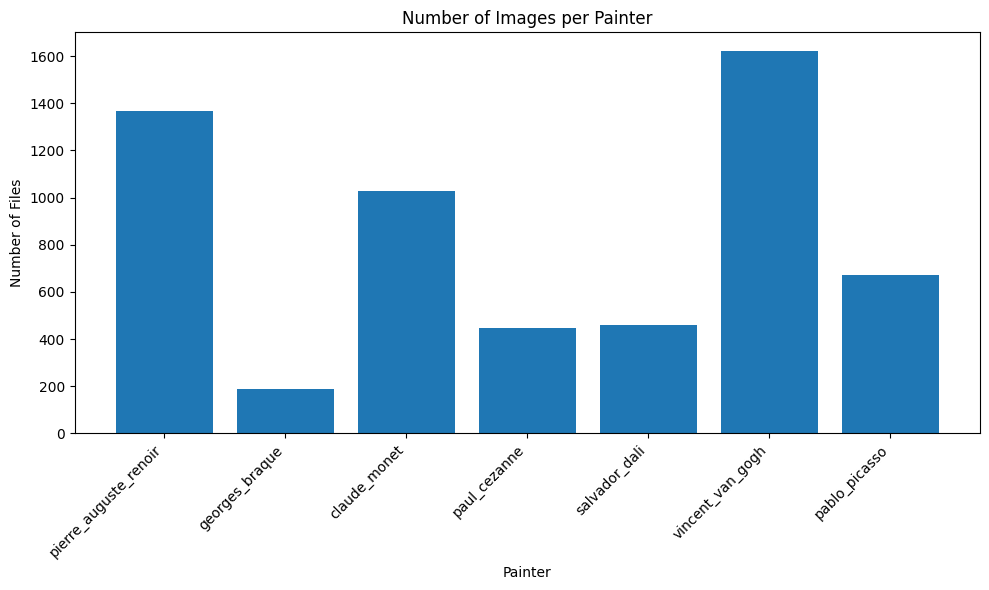

In [52]:
# Extract data for plotting
painters = list(file_counts.keys())
num_files = list(file_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(painters, num_files)
plt.xlabel("Painter")
plt.ylabel("Number of Files")
plt.title("Number of Images per Painter")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.show()


In [6]:
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor()
])

In [ ]:
# Define input and output directories
input_folder = '/Users/cisilkaraguzel/Documents/GitHub/artify/data/raw_data'  # Folder containing original images
output_folder = '/Users/cisilkaraguzel/Documents/GitHub/artify/data/processed_data'  # Folder to save processed images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Traverse through each subfolder in the input directory
for painter_folder in os.listdir(input_folder):
    painter_path = os.path.join(input_folder, painter_folder)
    
    # Only proceed if it's a directory (painter subfolder)
    if os.path.isdir(painter_path):
        # Create corresponding subfolder in the output directory
        processed_painter_path = os.path.join(output_folder, painter_folder)
        os.makedirs(processed_painter_path, exist_ok=True)
        
        # Process each image in the painter's folder
        for filename in os.listdir(painter_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                img_path = os.path.join(painter_path, filename)
                
                try:
                    # Load image
                    image = Image.open(img_path).convert("RGB")
                    
                    # Apply transformations
                    transformed_image = transform(image)
                    
                    # Convert tensor back to PIL image to save it
                    transformed_image_pil = transforms.ToPILImage()(transformed_image)
                    
                    # Save the processed image in the corresponding painter's subfolder
                    output_path = os.path.join(processed_painter_path, filename)
                    transformed_image_pil.save(output_path)
                    print(f"Processed and saved {filename} to {processed_painter_path}")
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

print("All images processed and saved successfully.")




Processed and saved pierre-auguste-renoir_maison-de-la-poste-1907.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_church-of-the-holy-trinity-in-paris-1893.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_gabrielle-with-a-rose-1911.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_on-the-path-1872.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_flowers-in-a-vase-3.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_cape-saint-jean-1910.jpg to /Users/cisilkaraguzel/Documents/GitHub/artify/processed_data/pierre_auguste_renoir
Processed and saved pierre-auguste-renoir_portrait-of-mada

In [2]:
def load_data_paths(data_dir):
    image_paths, labels = [], []
    for label, painter_dir in enumerate(os.listdir(data_dir)):
        painter_path = os.path.join(data_dir, painter_dir)
        for img_file in os.listdir(painter_path):
            image_paths.append(os.path.join(painter_path, img_file))
            labels.append(label)
    return image_paths, labels